# Análisis de Evasión de Clientes en Telecom X

Este informe presenta un análisis profesional sobre la evasión de clientes en Telecom X. Se aplican técnicas de ETL y visualización de datos para identificar patrones y proponer recomendaciones estratégicas.

##📌 Extracción de Datos

In [21]:
# Importación de librerías principales para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
cliente = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])
datosIniciales = pd.concat([df['customerID'], df['Churn']], axis=1)

##🔧 Transformación de Datos

### Transformación de variables de clientes

In [23]:
# Exploración de la estructura de datos de clientes
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [24]:
# Vista previa de los primeros registros de clientes
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [25]:
# Conversión de variables categóricas a numéricas
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [26]:
# Verificación de la transformación
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


### Transformación de variables de telefonía

In [27]:
# Exploración de la estructura de datos de telefonía
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [28]:
# Vista previa de los primeros registros de telefonía
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [29]:
# Revisión de valores únicos en MultipleLines
phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [30]:
# Conversión de variables categóricas a numéricas en telefonía
columnas = ['PhoneService', 'MultipleLines']
phone[columnas] = phone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [31]:
# Verificación de la transformación
phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


### Transformación de variables de internet

In [32]:
# Exploración de la estructura de datos de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [33]:
# Vista previa de los primeros registros de internet
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [34]:
# Revisión de valores únicos en servicios de internet
#internet['OnlineSecurity'].unique()
#internet['OnlineBackup'].unique()
#internet['DeviceProtection'].unique()
#internet['TechSupport'].unique()
#internet['StreamingTV'].unique()
internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
# Conversión de variables categóricas a numéricas en servicios de internet
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [36]:
# Verificación de la transformación
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [37]:
# Vista previa de los primeros registros de internet
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


### Transformación de variables de cuenta

In [38]:
# Exploración de la estructura de datos de cuenta
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [39]:
# Vista previa de los primeros registros de cuenta
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [40]:
# Revisión de valores vacíos en Charges.Total
cantidad_vacios = account['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [41]:
# Revisión de valores NaN en Charges.Total
cantidad_nan = account['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

In [42]:
# Conversión de Charges.Total a formato numérico
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [43]:
# Revisión de la columna transformada
account['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [44]:
# Revisión de la estructura de cuenta tras transformación
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [45]:
# Revisión de valores únicos en Contract
pd.unique(account['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [46]:
# Revisión de valores únicos en PaperlessBilling
pd.unique(account['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [47]:
# Conversión de PaperlessBilling a formato numérico
account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [48]:
# Revisión de valores únicos en PaymentMethod
pd.unique(account['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [49]:
# Creación de columna de cuentas diarias
account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.44
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


### Transformación de datos iniciales

In [50]:
# Revisión de estructura de datos iniciales
datosIniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [51]:
# Vista previa de los primeros registros de datos iniciales
datosIniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [52]:
# Revisión de valores vacíos en Churn
cantidad_vacios = datosIniciales['Churn'].str.strip().eq('').sum()
cantidad_vacios

np.int64(224)

In [53]:
# Revisión de valores únicos en Churn
pd.unique(datosIniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [54]:
# Conversión de Churn a formato numérico
datosIniciales['Churn'] = pd.to_numeric(
    datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [55]:
# Revisión final de datos iniciales
datosIniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


##📊 Carga y Análisis de Datos

In [56]:
# Creación del dataframe final para análisis
df_final = pd.concat([datosIniciales, cliente, phone, internet, account], axis=1)

In [57]:
# Descripción estadística del dataframe final
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [58]:
# Visualización del dataframe final
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [60]:
# Exportación del dataframe final a CSV
df_final.to_csv('df_resultado.csv', index=False)

In [61]:
# Cálculo de la variable objetivo (Churn)
churn_counts = df_final['Churn'].value_counts()

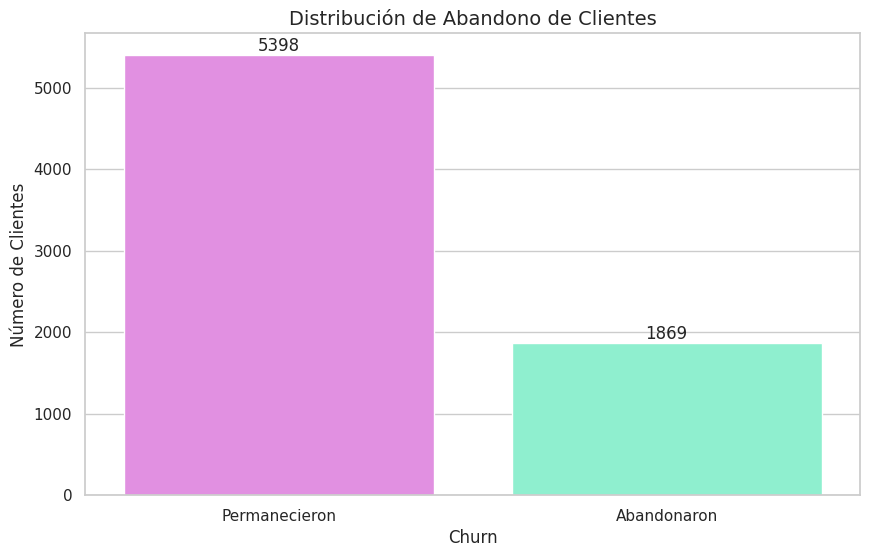

In [84]:
# Visualización de la distribución de Churn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["violet", "aquamarine"], legend=False)
plt.title('Distribución de Abandono de Clientes', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecieron', 'Abandonaron'])
for i, count in enumerate(churn_counts.values):
  plt.text(i, count + 50, str(count), ha='center', fontsize=12)
plt.show()

In [69]:
hombres = df_final[df_final['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_final[df_final['gender'] == 'Female']['Churn'].value_counts()

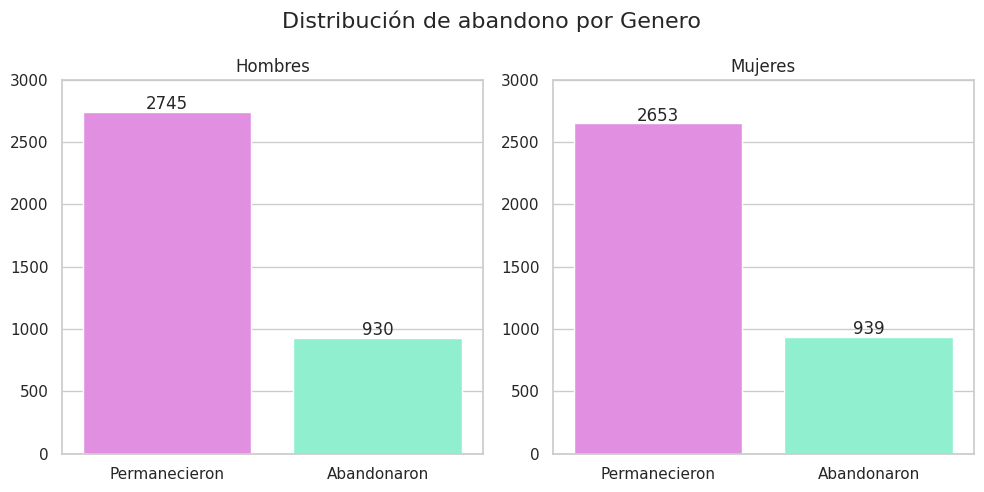

In [83]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de abandono por Genero', fontsize=16)

def plot_churn(data, ax, title):
  sns.barplot(
    x=data.index,
    y=data.values,
    hue=data.index,
    palette=["violet", "aquamarine"],
    legend=False,
    ax=ax
  )
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
  ax.set_ylim(0, 3000)
  for i, count in enumerate(data.values):
    ax.text(i, count+20, str(count), ha='center')

plot_churn(hombres, ax1, 'Hombres')
plot_churn(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()

In [72]:
no_senior = df_final[df_final['SeniorCitizen'] == 0]['Churn'].value_counts()
senior = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts()

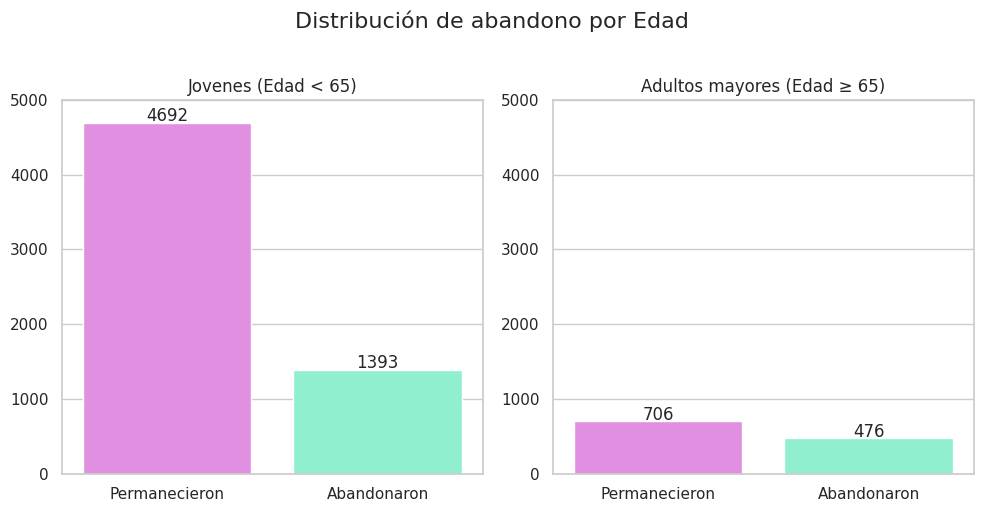

In [82]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de abandono por Edad', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
  sns.barplot(
    x=data.index,
    y=data.values,
    hue=data.index,
    palette=["violet", "aquamarine"],
    legend=False,
    ax=ax
  )
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
  ax.set_ylim(0, 5000)
  for i, count in enumerate(data.values):
    ax.text(i, count+20, str(count), ha='center')

plot_churn(no_senior, axs[0], 'Jovenes (Edad < 65)')
plot_churn(senior, axs[1], 'Adultos mayores (Edad ≥ 65)')

plt.tight_layout()
plt.show()

In [75]:
df_final['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [76]:
anio = df_final[df_final['Contract'] == 'One year']['Churn'].value_counts()
mes = df_final[df_final['Contract'] == 'Month-to-month']['Churn'].value_counts()
anios2= df_final[df_final['Contract'] == 'Two year']['Churn'].value_counts()

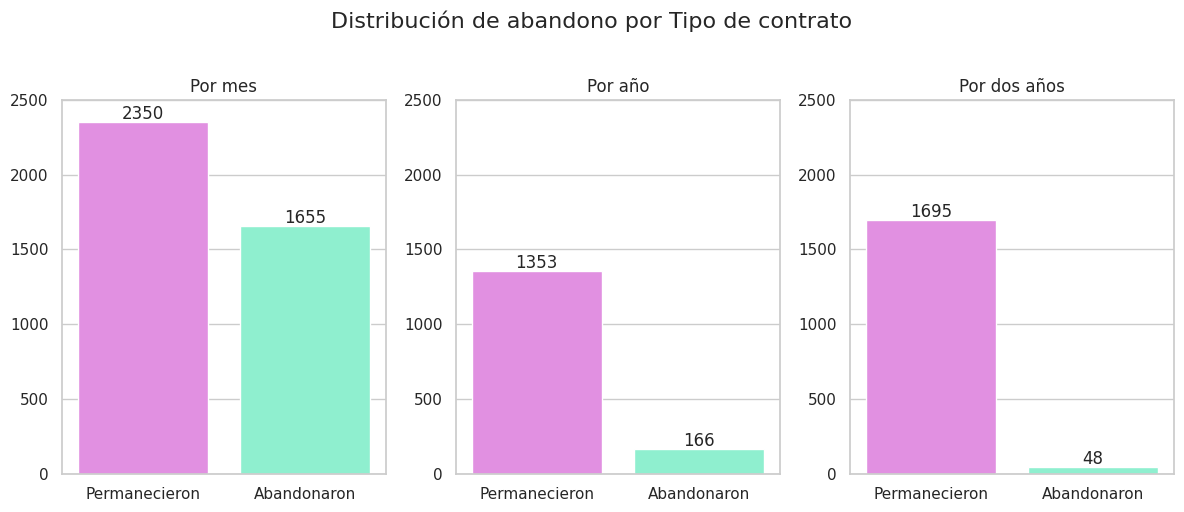

In [81]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Distribución de abandono por Tipo de contrato', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
  sns.barplot(
    x=data.index,
    y=data.values,
    hue=data.index,
    palette=["violet", "aquamarine"],
    legend=False,
    ax=ax
  )
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
  ax.set_ylim(0, 2500)
  for i, count in enumerate(data.values):
    ax.text(i, count+20, str(count), ha='center')

plot_churn(mes, axs[0], 'Por mes')
plot_churn(anio, axs[1], 'Por año')
plot_churn(anios2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

In [79]:
df_final['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [80]:
check = df_final[df_final['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
Electronic  = df_final[df_final['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
Credit = df_final[df_final['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
Bank = df_final[df_final['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()

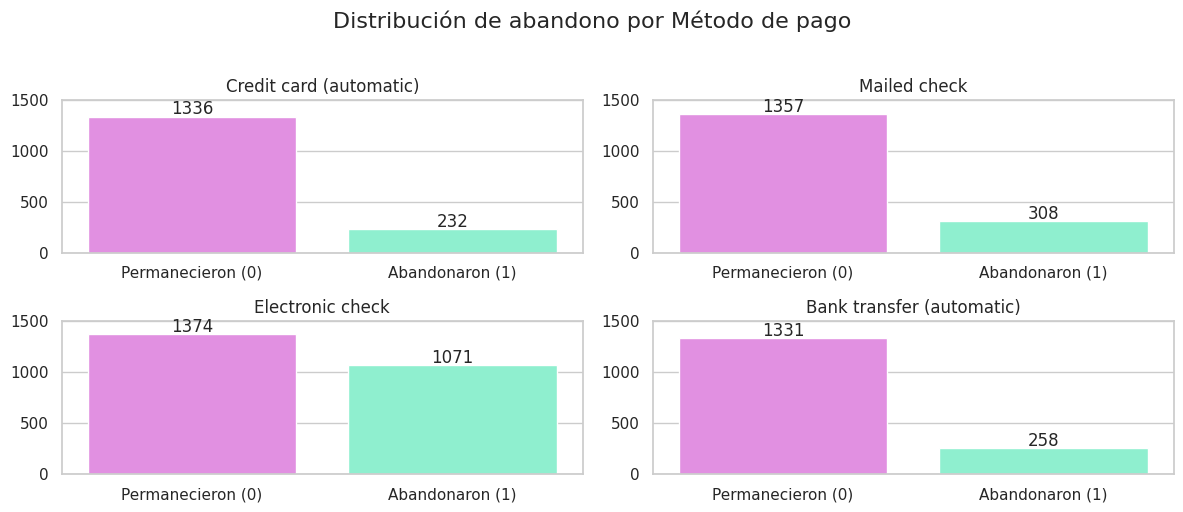

In [86]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Distribución de abandono por Método de pago', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
  sns.barplot(
    x=data.index,
    y=data.values,
    hue=data.index,
    palette=["violet", "aquamarine"],
    legend=False,
    ax=ax
  )
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
  ax.set_ylim(0, 1500)
  for i, count in enumerate(data.values):
    ax.text(i, count+20, str(count), ha='center')

plot_churn(check, axs[0][1], 'Mailed check')
plot_churn(Electronic, axs[1][0], 'Electronic check')
plot_churn(Credit, axs[0][0], 'Credit card (automatic)')
plot_churn(Bank, axs[1][1], 'Bank transfer (automatic)')


plt.tight_layout()
plt.show()

In [87]:
TotalGastado1 = df_final[df_final['Churn'] == 1]['Charges.Total']
TotalGastado0 = df_final[df_final['Churn'] == 0]['Charges.Total']
tiempoDeContrato0 = df_final[df_final['Churn'] == 0]['tenure']
tiempoDeContrato1 = df_final[df_final['Churn'] == 1]['tenure']

In [88]:
print("--- Total Gastado (Churn = 1) ---")
print(TotalGastado1.describe())
print("\n--- Total Gastado (Churn = 0) ---")
print(TotalGastado0.describe())

print("\n--- Tiempo de Contrato (Churn = 1) ---")
print(tiempoDeContrato1.describe())
print("\n--- Tiempo de Contrato (Churn = 0) ---")
print(tiempoDeContrato0.describe())

--- Total Gastado (Churn = 1) ---
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Charges.Total, dtype: float64

--- Total Gastado (Churn = 0) ---
count    5398.000000
mean     2535.263977
std      2330.802193
min         0.000000
25%       564.362500
50%      1663.625000
75%      4237.275000
max      8672.450000
Name: Charges.Total, dtype: float64

--- Tiempo de Contrato (Churn = 1) ---
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---
count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


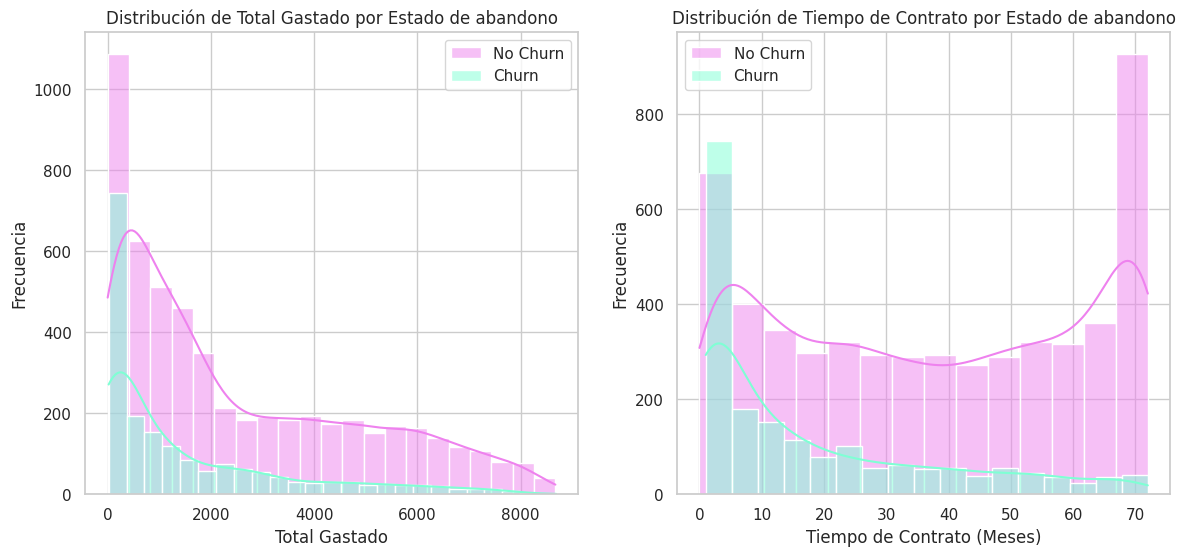

In [90]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color='violet', label='No Churn', kde=True)
sns.histplot(TotalGastado1, color='aquamarine', label='Churn', kde=True)
plt.title('Distribución de Total Gastado por Estado de abandono')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color='violet', label='No Churn', kde=True)
sns.histplot(tiempoDeContrato1, color='aquamarine', label='Churn', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de abandono')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

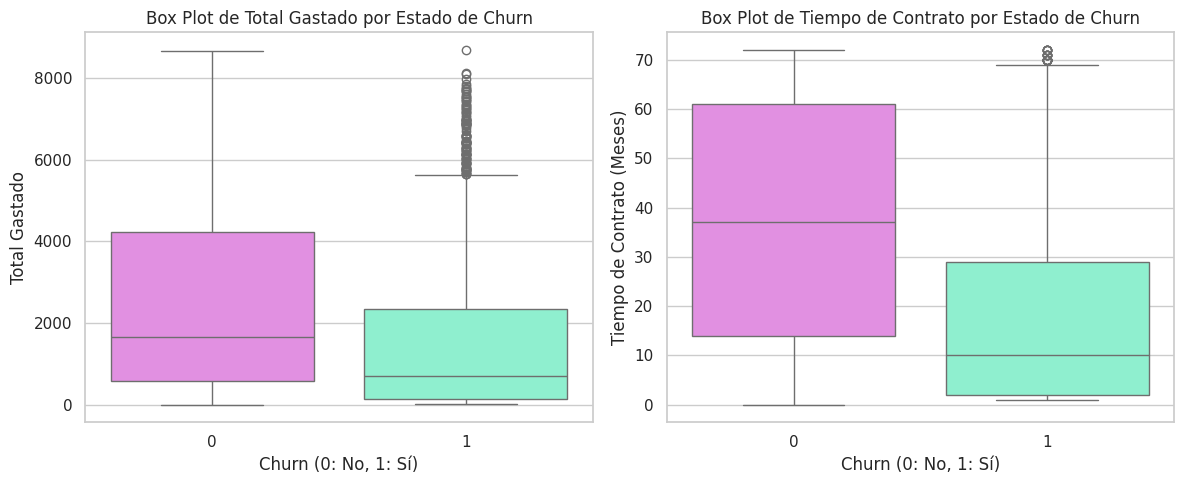

In [91]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_final, palette={'0': 'violet', '1': 'aquamarine'})
plt.title('Box Plot de Total Gastado por Estado de abandono')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_final, palette={'0': 'violet', '1': 'aquamarine'})
plt.title('Box Plot de Tiempo de Contrato por Estado de abandono')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()

#📄Informe final


🔹 **Resumen Ejecutivo**

Como asistente de análisis de datos en Telecom X, este informe tiene como objetivo comprender las causas del abandono de clientes (churn), un fenómeno que impacta directamente los ingresos y crecimiento de la compañía. A través del análisis de datos, se identifican factores clave que explican el churn y se proponen estrategias para mitigarlo, sirviendo de base para futuros modelos predictivos y acciones de retención.

🔹 **Preparación de Datos**

El proceso inició con un archivo JSON dividido en cinco DataFrames. Las transformaciones incluyeron:

+ Normalización categórica: Conversión de `Yes / No` a `1 / 0`.

+ Tratamiento de valores "No `algo` service": Reemplazo por 0.

+ Corrección de `Charges.Total`: Conversión de cadenas vacías a 0 y cambio a tipo numérico.

+ Nueva métrica: Se creó cuentas_diarias como estimación del gasto diario.

+ Consolidación: Todos los DataFrames fueron unificados en df_final para facilitar el análisis.

🔹 **Análisis Exploratorio de Datos (EDA)**

Se identificaron patrones relevantes en los datos:

+ Churn general: El 25.7% de los clientes abandonaron el servicio.

+ Factores asociados al churn:

  + Contrato: Los contratos mensuales tienen mayor riesgo de abandono; los contratos a dos años, el menor.

  + Método de pago: El cheque electrónico presenta el churn más alto; la tarjeta de crédito, el más bajo.

  + Seniority: Los clientes no seniors tienen mayor tasa de abandono.

  + Gasto total y antigüedad: Los clientes que abandonan gastan menos y tienen menor tiempo con la empresa.

🔹 Insights Clave

+ Clientes de alto riesgo: Contratos mensuales, pagos por cheque electrónico, bajo gasto y menor antigüedad.

+ Importancia de los primeros meses: El abandono ocurre con mayor frecuencia en los primeros `10–20` meses.

+ Método de pago como indicador: Los pagos con tarjeta de crédito reflejan mayor estabilidad.

+ Valor del cliente: A menor gasto acumulado, mayor probabilidad de churn.

+ Contratos largos reducen el churn: Los contratos a dos años actúan como ancla de permanencia.

🔹 Recomendaciones Estratégicas

+ Mejorar onboarding en los primeros meses: Seguimiento personalizado, tutoriales y promociones iniciales.

+ Fomentar contratos a largo plazo: Descuentos y beneficios por migrar a contratos anuales o bianuales.

+ Reducir uso del cheque electrónico: Investigar causas de churn e incentivar métodos más estables.

+ Programas de retención focalizados: Ofertas para clientes con bajo gasto o no seniors.

+ Desarrollar modelos predictivos: Incorporar variables clave para anticipar abandono y activar estrategias proactivas.